In [23]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/content/CPARs.csv')

# Display the first 5 rows of the dataset
print(df.head())


                                     dicom_file      CPAR
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014  0.300302
1  2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab  0.258921
2  2a280266-c8bae121-54d75383-cac046f4-ca37aa16  0.340023
3  b75df1bd-0f22d631-52d73526-2ae7b85a-d843b39d  0.343356
4  c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c  2.000000


In [24]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/content/CTRs.csv')

# Display the first 5 rows of the dataset
print(df.head())


                                     dicom_file       CTR
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014  0.442639
1  2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab  0.408860
2  2a280266-c8bae121-54d75383-cac046f4-ca37aa16  0.479361
3  b75df1bd-0f22d631-52d73526-2ae7b85a-d843b39d  0.474415
4  c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c  0.560569


In [43]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load CPAR dataset
cpar_df = pd.read_csv('/content/CPARs.csv')

# Create a synthetic target variable (for demonstration)
cpar_df['mental_health_status'] = (cpar_df['CPAR'] > 0.3).astype(int)  # Example condition

# Features and target variable
X_cpar = cpar_df[['CPAR']]
y_cpar = cpar_df['mental_health_status']

# Train-test split
X_train_cpar, X_test_cpar, y_train_cpar, y_test_cpar = train_test_split(X_cpar, y_cpar, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_cpar = scaler.fit_transform(X_train_cpar)
X_test_cpar = scaler.transform(X_test_cpar)

# Initialize results dictionary for CPAR
results_cpar = {}

# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_cpar, y_train_cpar)
y_pred_lr = model_lr.predict(X_test_cpar)
results_cpar['Logistic Regression'] = accuracy_score(y_test_cpar, y_pred_lr)

# 2. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_cpar, y_train_cpar)
y_pred_dt = model_dt.predict(X_test_cpar)
results_cpar['Decision Tree'] = accuracy_score(y_test_cpar, y_pred_dt)

# 3. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_cpar, y_train_cpar)
y_pred_rf = model_rf.predict(X_test_cpar)
results_cpar['Random Forest'] = accuracy_score(y_test_cpar, y_pred_rf)

# 4. Support Vector Machine (SVM)
model_svc = SVC(random_state=42)
model_svc.fit(X_train_cpar, y_train_cpar)
y_pred_svc = model_svc.predict(X_test_cpar)
results_cpar['Support Vector Machine'] = accuracy_score(y_test_cpar, y_pred_svc)

# 5. Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_cpar, y_train_cpar)
y_pred_xgb = model_xgb.predict(X_test_cpar)
results_cpar['XGBoost'] = accuracy_score(y_test_cpar, y_pred_xgb)

# Print results for CPAR
for model_name, accuracy in results_cpar.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model for CPAR
best_model_cpar = max(results_cpar, key=results_cpar.get)
print(f"The best model for CPAR dataset is: {best_model_cpar} with an accuracy of {results_cpar[best_model_cpar]:.4f}")

# Save the best model and scaler to pickle files
models_to_save = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Support Vector Machine": model_svc,
    "XGBoost": model_xgb,
    "Scaler": scaler  # Saving the scaler as well
}

# Save each model and scaler in a pickle file
for model_name, model in models_to_save.items():
    with open(f'/content/{model_name.replace(" ", "_").lower()}.pkl', 'wb') as f:
        pickle.dump(model, f)

print("Models and scaler have been saved successfully!")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:35:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.9998
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9999
XGBoost Accuracy: 0.9990
The best model for CPAR dataset is: Decision Tree with an accuracy of 1.0000
Models and scaler have been saved successfully!


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load CPAR dataset
cpar_df = pd.read_csv('/content/CPARs.csv')

# Create a synthetic target variable (for demonstration)
cpar_df['mental_health_status'] = (cpar_df['CPAR'] > 0.3).astype(int)  # Example condition

# Features and target variable
X_cpar = cpar_df[['CPAR']]
y_cpar = cpar_df['mental_health_status']

# Train-test split
X_train_cpar, X_test_cpar, y_train_cpar, y_test_cpar = train_test_split(X_cpar, y_cpar, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_cpar = scaler.fit_transform(X_train_cpar)
X_test_cpar = scaler.transform(X_test_cpar)

# Initialize results dictionary for CPAR
results_cpar = {}

# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_cpar, y_train_cpar)
y_pred_lr = model_lr.predict(X_test_cpar)
results_cpar['Logistic Regression'] = accuracy_score(y_test_cpar, y_pred_lr)

# 2. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_cpar, y_train_cpar)
y_pred_dt = model_dt.predict(X_test_cpar)
results_cpar['Decision Tree'] = accuracy_score(y_test_cpar, y_pred_dt)

# 3. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_cpar, y_train_cpar)
y_pred_rf = model_rf.predict(X_test_cpar)
results_cpar['Random Forest'] = accuracy_score(y_test_cpar, y_pred_rf)

# 4. Support Vector Machine (SVM)
model_svc = SVC(random_state=42)
model_svc.fit(X_train_cpar, y_train_cpar)
y_pred_svc = model_svc.predict(X_test_cpar)
results_cpar['Support Vector Machine'] = accuracy_score(y_test_cpar, y_pred_svc)

# 5. Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_cpar, y_train_cpar)
y_pred_xgb = model_xgb.predict(X_test_cpar)
results_cpar['XGBoost'] = accuracy_score(y_test_cpar, y_pred_xgb)

# Print results for CPAR
for model_name, accuracy in results_cpar.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model for CPAR
best_model_cpar = max(results_cpar, key=results_cpar.get)
print(f"The best model for CPAR dataset is: {best_model_cpar} with an accuracy of {results_cpar[best_model_cpar]:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:12:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.9998
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9999
XGBoost Accuracy: 0.9990
The best model for CPAR dataset is: Decision Tree with an accuracy of 1.0000


In [26]:
# Load CTR dataset
ctr_df = pd.read_csv('/content/CTRs.csv')

# Create a synthetic target variable (for demonstration)
ctr_df['mental_health_status'] = (ctr_df['CTR'] > 0.45).astype(int)  # Example condition

# Features and target variable
X_ctr = ctr_df[['CTR']]
y_ctr = ctr_df['mental_health_status']

# Train-test split
X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(X_ctr, y_ctr, test_size=0.2, random_state=42)

# Standardize features
X_train_ctr = scaler.fit_transform(X_train_ctr)
X_test_ctr = scaler.transform(X_test_ctr)

# Initialize results dictionary for CTR
results_ctr = {}

# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_ctr, y_train_ctr)
y_pred_lr = model_lr.predict(X_test_ctr)
results_ctr['Logistic Regression'] = accuracy_score(y_test_ctr, y_pred_lr)

# 2. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_ctr, y_train_ctr)
y_pred_dt = model_dt.predict(X_test_ctr)
results_ctr['Decision Tree'] = accuracy_score(y_test_ctr, y_pred_dt)

# 3. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_ctr, y_train_ctr)
y_pred_rf = model_rf.predict(X_test_ctr)
results_ctr['Random Forest'] = accuracy_score(y_test_ctr, y_pred_rf)

# 4. Support Vector Machine (SVM)
model_svc = SVC(random_state=42)
model_svc.fit(X_train_ctr, y_train_ctr)
y_pred_svc = model_svc.predict(X_test_ctr)
results_ctr['Support Vector Machine'] = accuracy_score(y_test_ctr, y_pred_svc)

# 5. Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_ctr, y_train_ctr)
y_pred_xgb = model_xgb.predict(X_test_ctr)
results_ctr['XGBoost'] = accuracy_score(y_test_ctr, y_pred_xgb)

# Print results for CTR
for model_name, accuracy in results_ctr.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model for CTR
best_model_ctr = max(results_ctr, key=results_ctr.get)
print(f"The best model for CTR dataset is: {best_model_ctr} with an accuracy of {results_ctr[best_model_ctr]:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.9988
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9994
XGBoost Accuracy: 0.9985
The best model for CTR dataset is: Decision Tree with an accuracy of 1.0000


In [44]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load CTR dataset
ctr_df = pd.read_csv('/content/CTRs.csv')

# Create a synthetic target variable (for demonstration)
ctr_df['mental_health_status'] = (ctr_df['CTR'] > 0.45).astype(int)  # Example condition

# Features and target variable
X_ctr = ctr_df[['CTR']]
y_ctr = ctr_df['mental_health_status']

# Train-test split
X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(X_ctr, y_ctr, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()  # Initialize a new scaler for CTR
X_train_ctr = scaler.fit_transform(X_train_ctr)
X_test_ctr = scaler.transform(X_test_ctr)

# Initialize results dictionary for CTR
results_ctr = {}

# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_ctr, y_train_ctr)
y_pred_lr = model_lr.predict(X_test_ctr)
results_ctr['Logistic Regression'] = accuracy_score(y_test_ctr, y_pred_lr)

# 2. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_ctr, y_train_ctr)
y_pred_dt = model_dt.predict(X_test_ctr)
results_ctr['Decision Tree'] = accuracy_score(y_test_ctr, y_pred_dt)

# 3. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_ctr, y_train_ctr)
y_pred_rf = model_rf.predict(X_test_ctr)
results_ctr['Random Forest'] = accuracy_score(y_test_ctr, y_pred_rf)

# 4. Support Vector Machine (SVM)
model_svc = SVC(random_state=42)
model_svc.fit(X_train_ctr, y_train_ctr)
y_pred_svc = model_svc.predict(X_test_ctr)
results_ctr['Support Vector Machine'] = accuracy_score(y_test_ctr, y_pred_svc)

# 5. Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_ctr, y_train_ctr)
y_pred_xgb = model_xgb.predict(X_test_ctr)
results_ctr['XGBoost'] = accuracy_score(y_test_ctr, y_pred_xgb)

# Print results for CTR
for model_name, accuracy in results_ctr.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model for CTR
best_model_ctr = max(results_ctr, key=results_ctr.get)
print(f"The best model for CTR dataset is: {best_model_ctr} with an accuracy of {results_ctr[best_model_ctr]:.4f}")

# Save the best model and scaler to pickle files
models_to_save_ctr = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Support Vector Machine": model_svc,
    "XGBoost": model_xgb,
    "Scaler": scaler  # Saving the scaler as well
}

# Save each model and scaler in a pickle file
for model_name, model in models_to_save_ctr.items():
    with open(f'/content/{model_name.replace(" ", "_").lower()}.pkl', 'wb') as f:
        pickle.dump(model, f)

print("Models and scaler for CTR have been saved successfully!")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.9988
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9994
XGBoost Accuracy: 0.9985
The best model for CTR dataset is: Decision Tree with an accuracy of 1.0000
Models and scaler for CTR have been saved successfully!


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CPAR dataset
cpar_df = pd.read_csv('/content/CPARs.csv')

# Create a synthetic target variable for CPAR (for demonstration)
cpar_df['mental_health_status'] = (cpar_df['CPAR'] > 0.3).astype(int)

# Load CTR dataset
ctr_df = pd.read_csv('/content/CTRs.csv')

# Create a synthetic target variable for CTR (for demonstration)
ctr_df['mental_health_status'] = (ctr_df['CTR'] > 0.45).astype(int)

# Combine both datasets
merged_df = pd.merge(cpar_df, ctr_df, on='dicom_file', suffixes=('_cpar', '_ctr'))

# Create the target variable for the combined dataset
merged_df['mental_health_status'] = (merged_df['CPAR'] > 0.3) | (merged_df['CTR'] > 0.45)
merged_df['mental_health_status'] = merged_df['mental_health_status'].astype(int)

# Features and target variable
X_combined = merged_df[['CPAR', 'CTR']]
y_combined = merged_df['mental_health_status']

# Train-test split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_combined, y_train_combined)
y_pred_dt = model_dt.predict(X_test_combined)
accuracy_dt = accuracy_score(y_test_combined, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 0.9999


In [29]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_combined, y_train_combined)
y_pred_lr = model_lr.predict(X_test_combined)
accuracy_lr = accuracy_score(y_test_combined, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


Logistic Regression Accuracy: 0.9635


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_combined, y_train_combined)
y_pred_rf = model_rf.predict(X_test_combined)
accuracy_rf = accuracy_score(y_test_combined, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.9999


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_combined, y_train_combined)
y_pred_knn = model_knn.predict(X_test_combined)
accuracy_knn = accuracy_score(y_test_combined, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")


K-Nearest Neighbors Accuracy: 0.9991


In [32]:
from sklearn.svm import SVC

# Support Vector Machine
model_svc = SVC(random_state=42)
model_svc.fit(X_train_combined, y_train_combined)
y_pred_svc = model_svc.predict(X_test_combined)
accuracy_svc = accuracy_score(y_test_combined, y_pred_svc)
print(f"Support Vector Machine Accuracy: {accuracy_svc:.4f}")


Support Vector Machine Accuracy: 0.9712


In [ ]:
from xgboost import XGBClassifier

# Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_combined, y_train_combined)
y_pred_xgb = model_xgb.predict(X_test_combined)
accuracy_xgb = accuracy_score(y_test_combined, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9991


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_combined, y_train_combined)
y_pred_nb = model_nb.predict(X_test_combined)
accuracy_nb = accuracy_score(y_test_combined, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")


Naive Bayes Accuracy: 0.8599


In [ ]:
# Collecting results
results = {
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svc,
    "XGBoost": accuracy_xgb,
    "Naive Bayes": accuracy_nb,
}

# Determine the best model
best_model = max(results, key=results.get)
print(f"The best model for the combined dataset is: {best_model} with an accuracy of {results[best_model]:.4f}")


The best model for the combined dataset is: Decision Tree with an accuracy of 0.9999


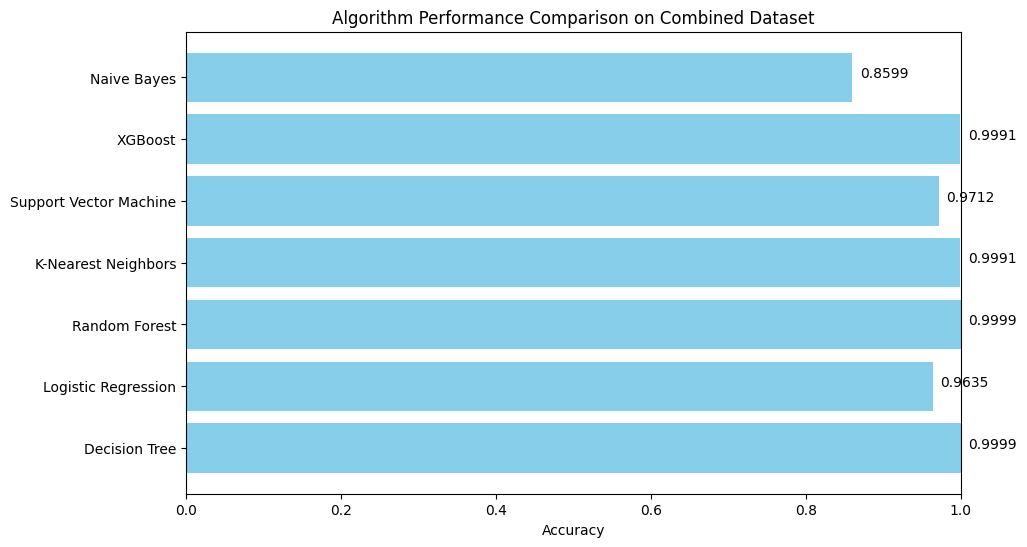

In [ ]:
import matplotlib.pyplot as plt

# Accuracy results for each algorithm
results = {
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svc,
    "XGBoost": accuracy_xgb,
    "Naive Bayes": accuracy_nb,
}

# Plotting the accuracies
algorithms = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(algorithms, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Algorithm Performance Comparison on Combined Dataset')
plt.xlim(0, 1)  # Assuming accuracy scores are between 0 and 1
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.4f}")

plt.show()


In [33]:
# Combine both datasets on 'dicom_file'
merged_df = pd.merge(cpar_df, ctr_df, on='dicom_file', suffixes=('_cpar', '_ctr'))

# Create a synthetic target variable (for demonstration)
merged_df['mental_health_status'] = (merged_df['CPAR'] > 0.3) | (merged_df['CTR'] > 0.45)  # Example condition
merged_df['mental_health_status'] = merged_df['mental_health_status'].astype(int)

# Features and target variable
X_combined = merged_df[['CPAR', 'CTR']]
y_combined = merged_df['mental_health_status']

# Train-test split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Standardize features
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

# Initialize results dictionary for combined dataset
results_combined = {}

# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_combined, y_train_combined)
y_pred_lr = model_lr.predict(X_test_combined)
results_combined['Logistic Regression'] = accuracy_score(y_test_combined, y_pred_lr)

# 2. Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_combined, y_train_combined)
y_pred_dt = model_dt.predict(X_test_combined)
results_combined['Decision Tree'] = accuracy_score(y_test_combined, y_pred_dt)

# 3. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_combined, y_train_combined)
y_pred_rf = model_rf.predict(X_test_combined)
results_combined['Random Forest'] = accuracy_score(y_test_combined, y_pred_rf)

# 4. Support Vector Machine (SVM)
model_svc = SVC(random_state=42)
model_svc.fit(X_train_combined, y_train_combined)
y_pred_svc = model_svc.predict(X_test_combined)
results_combined['Support Vector Machine'] = accuracy_score(y_test_combined, y_pred_svc)

# 5. Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_combined, y_train_combined)
y_pred_xgb = model_xgb.predict(X_test_combined)
results_combined['XGBoost'] = accuracy_score(y_test_combined, y_pred_xgb)

# Print results for combined dataset
for model_name, accuracy in results_combined.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Determine the best model for combined dataset
best_model_combined = max(results_combined, key=results_combined.get)
print(f"The best model for the combined dataset is: {best_model_combined} with an accuracy of {results_combined[best_model_combined]:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.9635
Decision Tree Accuracy: 0.9999
Random Forest Accuracy: 0.9999
Support Vector Machine Accuracy: 0.9712
XGBoost Accuracy: 0.9991
The best model for the combined dataset is: Decision Tree with an accuracy of 0.9999


1. Voting Classifier

Voting Classifier Accuracy: 0.9999480060313004


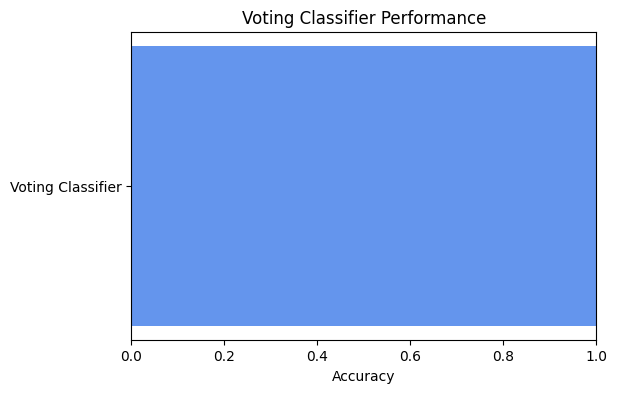

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create and fit Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft')
voting_clf.fit(X_train_combined, y_train_combined)

# Predict and calculate accuracy
y_pred_voting = voting_clf.predict(X_test_combined)
accuracy_voting = accuracy_score(y_test_combined, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

# Plot accuracy for Voting Classifier
plt.figure(figsize=(6, 4))
plt.barh(['Voting Classifier'], [accuracy_voting], color='cornflowerblue')
plt.xlabel('Accuracy')
plt.title('Voting Classifier Performance')
plt.xlim(0, 1)
plt.show()


2. Bagging Classifier

Bagging Classifier Accuracy: 1.0


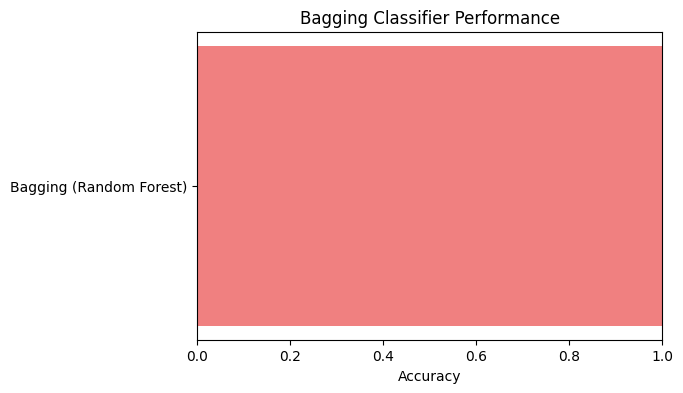

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and fit Bagging Classifier
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train_combined, y_train_combined)

# Predict and calculate accuracy
y_pred_bagging = bagging_clf.predict(X_test_combined)
accuracy_bagging = accuracy_score(y_test_combined, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

# Plot accuracy for Bagging Classifier
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.barh(['Bagging (Random Forest)'], [accuracy_bagging], color='lightcoral')
plt.xlabel('Accuracy')
plt.title('Bagging Classifier Performance')
plt.xlim(0, 1)
plt.show()


3. Boosting(AdaBosst)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Classifier (AdaBoost) Accuracy: 0.9999480060313004


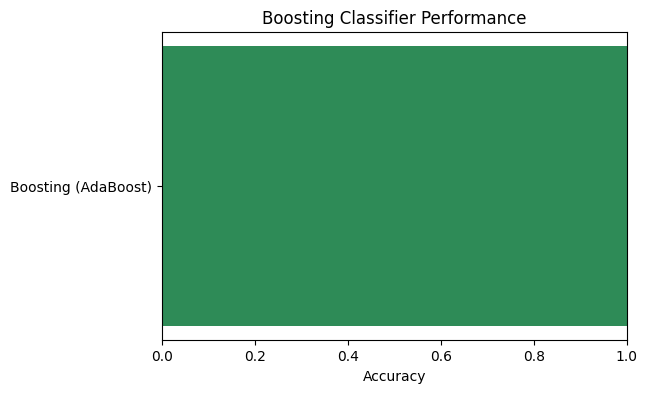

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create and fit AdaBoost Classifier
boosting_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(X_train_combined, y_train_combined)

# Predict and calculate accuracy
y_pred_boosting = boosting_clf.predict(X_test_combined)
accuracy_boosting = accuracy_score(y_test_combined, y_pred_boosting)
print("Boosting Classifier (AdaBoost) Accuracy:", accuracy_boosting)

# Plot accuracy for Boosting Classifier
plt.figure(figsize=(6, 4))
plt.barh(['Boosting (AdaBoost)'], [accuracy_boosting], color='seagreen')
plt.xlabel('Accuracy')
plt.title('Boosting Classifier Performance')
plt.xlim(0, 1)
plt.show()


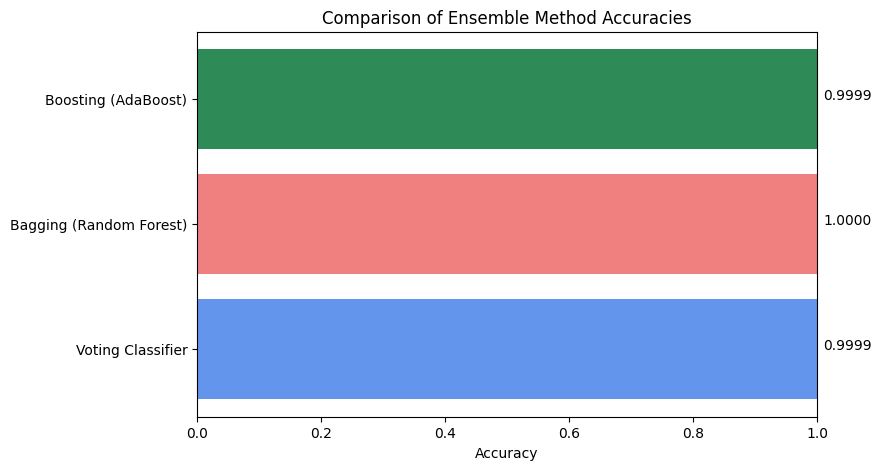

In [ ]:
# Combine all ensemble methods' accuracies in one plot
ensemble_results = {
    "Voting Classifier": accuracy_voting,
    "Bagging (Random Forest)": accuracy_bagging,
    "Boosting (AdaBoost)": accuracy_boosting,
}

# Plot all ensemble accuracies
plt.figure(figsize=(8, 5))
plt.barh(list(ensemble_results.keys()), list(ensemble_results.values()), color=['cornflowerblue', 'lightcoral', 'seagreen'])
plt.xlabel('Accuracy')
plt.title('Comparison of Ensemble Method Accuracies')
plt.xlim(0, 1)

# Display accuracy on each bar
for i, (name, accuracy) in enumerate(ensemble_results.items()):
    plt.text(accuracy + 0.01, i, f"{accuracy:.4f}")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


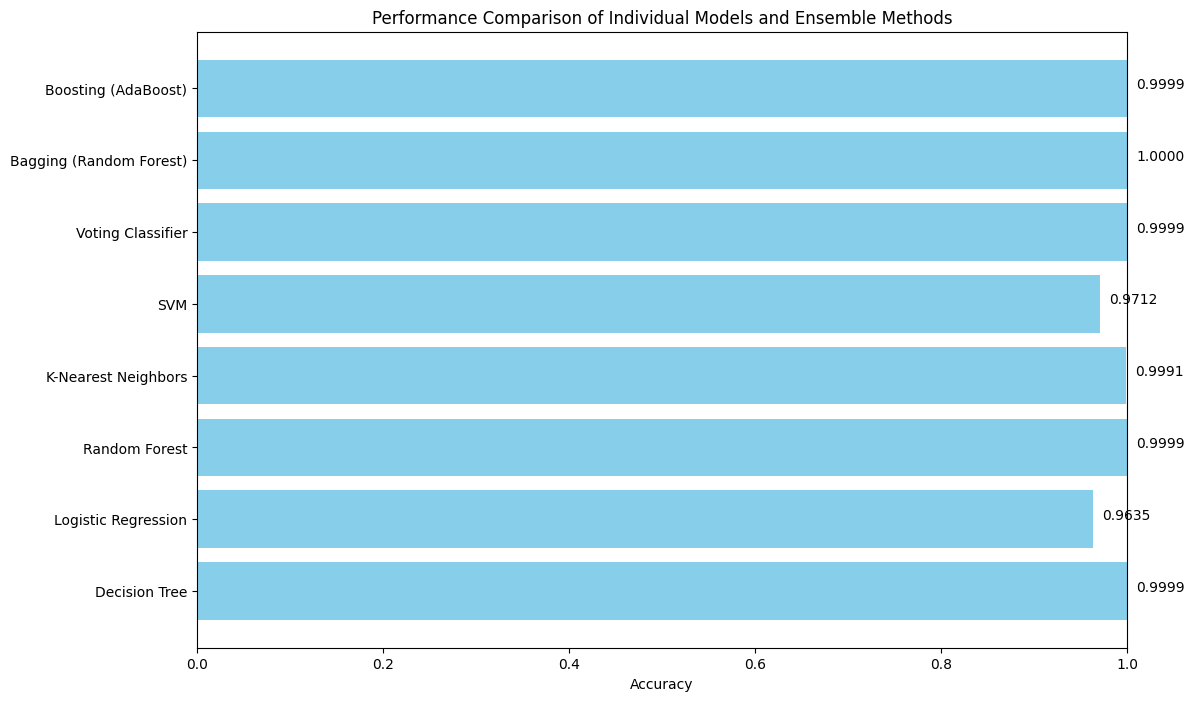

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dictionary to store results
results = {}

# Train and evaluate individual models
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_combined, y_train_combined)
y_pred_dt = dt.predict(X_test_combined)
results['Decision Tree'] = accuracy_score(y_test_combined, y_pred_dt)

# 2. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_combined, y_train_combined)
y_pred_lr = lr.predict(X_test_combined)
results['Logistic Regression'] = accuracy_score(y_test_combined, y_pred_lr)

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_combined, y_train_combined)
y_pred_rf = rf.predict(X_test_combined)
results['Random Forest'] = accuracy_score(y_test_combined, y_pred_rf)

# 4. K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_combined, y_train_combined)
y_pred_knn = knn.predict(X_test_combined)
results['K-Nearest Neighbors'] = accuracy_score(y_test_combined, y_pred_knn)

# 5. Support Vector Machine
svm = SVC()
svm.fit(X_train_combined, y_train_combined)
y_pred_svm = svm.predict(X_test_combined)
results['SVM'] = accuracy_score(y_test_combined, y_pred_svm)

# Train and evaluate ensemble methods
# 1. Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft')
voting_clf.fit(X_train_combined, y_train_combined)
y_pred_voting = voting_clf.predict(X_test_combined)
results['Voting Classifier'] = accuracy_score(y_test_combined, y_pred_voting)

# 2. Bagging Classifier (with Random Forest)
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train_combined, y_train_combined)
y_pred_bagging = bagging_clf.predict(X_test_combined)
results['Bagging (Random Forest)'] = accuracy_score(y_test_combined, y_pred_bagging)

# 3. Boosting (AdaBoost)
boosting_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(X_train_combined, y_train_combined)
y_pred_boosting = boosting_clf.predict(X_test_combined)
results['Boosting (AdaBoost)'] = accuracy_score(y_test_combined, y_pred_boosting)

# Plotting the results
algorithms = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 8))
plt.barh(algorithms, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Performance Comparison of Individual Models and Ensemble Methods')
plt.xlim(0, 1)  # Assuming accuracy values are between 0 and 1

# Display accuracy on each bar
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.4f}")

plt.show()


In [34]:
import pickle


In [40]:
# Ensure correct data types
X = X.astype(float)  # Convert features to float if needed
y_cpar = y_cpar.astype(float)  # Convert target to float if needed
